# Naive Bayes Classifier

Atividade(2.0): 
     
      Realizar classificação com o Naive Bayes:
      
<ol>
        <li> Utilizando um dataset que seja multiclasse (a sua escolha). Dica: selecionar no máximo 5 características; </li> 
        <li> Extrapolar o exemplo acima para avaliar a acurácia de classificação para um conjunto de teste (divisão treino/teste a sua escolha);</li> 
        <li> Tentem utilizar uma distribuição diferente da Gaussiana;</li> 
        <li> Comparem a acurácia do modelo desenvolvido por vocês com a acurácia do modelo provido pelo sklearn;</li> 
    
</ol>

## Importando as Bibliotecas:

In [1]:
import numpy as np
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, accuracy_score, recall_score, classification_report

## Carregando o Dataset

O dataset escolhido foi o flor Iris. O conjunto de dados flor Iris é um conjunto de dados multivariados introduzido pelo estatístico e biólogo britânico Ronald Fisher em seu artigo de 1936, O uso de múltiplas medições em problemas taxonômicos,como um exemplo de análise discriminante linear. 



In [2]:
from sklearn.datasets import load_iris
iris_df = load_iris()

X = iris_df.data
y = iris_df.target

O conjunto de dados consiste em 50 amostras de cada uma das três espécies de Iris ( Iris setosa, Iris virginica e Iris versicolor ). 

Quatro variáveis foram medidas em cada amostra: o comprimento e a largura das sépalas e pétalas, em centímetros. 

Desta forma temos 3 classes e 4 caracteristicas.

## Extrapolar o exemplo dado para avaliar a acurácia de classificação para um conjunto de teste (divisão treino/teste a sua escolha);

In [3]:
#Dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

O conjunto foi dividido em 25% de teste e 75% treino

### 1 - Calculando as probablidades anteriores ( Priors ) P(y_i)

In [4]:
def calculate_priors(X, y):
    priors = []
    classes = np.unique(y)
    for target in classes:
        X_target = X[y == target]    
        prior = len(X_target) / len(X)
        priors.append(prior)
    return priors

In [5]:
priors = calculate_priors(X_train,y_train)

### 2 - Gerar as probabilidades condicionais P(x_1|y_i) x P(x_2|y_i) x P(x_3|y_i) x ... x P(x_n|y_i)

#### 2.1 - Separar os dados em grupos de amostras de cada classe:

In [6]:
Xy0 = X_train[y_train == 0] # Classe 1 - setosa 
Xy1 = X_train[y_train == 1] # Classe 2 - versicola
Xy2 = X_train[y_train == 2] # Classe 3 - virginica

### 2.2 - Função que prepara a distribuição de probabilidade de cada variavel:

In [7]:
def fit_gaussian_distribution(data):
    mu = np.mean(data)
    sigma = np.std(data)
    dist = norm(mu, sigma)
    return dist

#### 2.3 - Calculando as PDFs para as características pertencentes a cada 1 das classes

In [8]:
# Para y=0
X1y0 = fit_gaussian_distribution(Xy0[:, 0]) #P(x_1|0)
X2y0 = fit_gaussian_distribution(Xy0[:, 1]) #P(x_2|0)
X3y0 = fit_gaussian_distribution(Xy0[:,2]) #P(x_3|0)
X4y0 = fit_gaussian_distribution(Xy0[:,3]) #P(x_4|0)

# Para y=1
X1y1 = fit_gaussian_distribution(Xy1[:, 0]) #P(x_1|1)
X2y1 = fit_gaussian_distribution(Xy1[:, 1]) #P(x_2|1)
X3y1 = fit_gaussian_distribution(Xy1[:,2]) #P(x_3|1)
X4y1 = fit_gaussian_distribution(Xy1[:,3]) #P(x_4|1)

# Para y=2
X1y2 = fit_gaussian_distribution(Xy2[:, 0]) #P(x_1|2)
X2y2 = fit_gaussian_distribution(Xy2[:, 1]) #P(x_2|2)
X3y2 = fit_gaussian_distribution(Xy2[:,2]) #P(x_3|2)
X4y2 = fit_gaussian_distribution(Xy2[:,3]) #P(x_4|2)


### 3 - Calculando a Probabilidade a posteriore P(y_i / x_1,x_2, ... , x_n)

In [9]:
# função que calcula a probabilidade posterior
def posterior_probability(X, prior, dist1, dist2, dist3, dist4):
    return prior * dist1.pdf(X[0]) * dist2.pdf(X[1]) * dist3.pdf(X[2]) * dist4.pdf(X[3])

In [10]:
# Probabilidade condicional para 1 exemplo 
X_t, y_t = X_test[4], y_test[4]
priors = calculate_priors(X_train,y_train)
posterior = []
Py0 = posterior_probability(X_t, priors[0], X1y0, X2y0, X3y0, X4y0)
Py1 = posterior_probability(X_t,  priors[1], X1y1, X2y1, X3y1, X4y1)
Py2 = posterior_probability(X_t,  priors[2], X1y2, X2y2, X3y2, X4y2)
posterior.append(Py0)
posterior.append(Py1)
posterior.append(Py2)
y_pred = posterior.index(max(posterior))

In [11]:
# calculando a probabilidade condicional para 1 conjunto de teste 

def naive_bayes_test(X,y, priors):
    y_pred = np.zeros(y.shape)
    for i in range(y.shape[0]):
        X_t, y_t = X[i], y[i]
        posterior = []
        Py0 = posterior_probability(X_t, priors[0], X1y0, X2y0, X3y0, X4y0)
        Py1 = posterior_probability(X_t,  priors[1], X1y1, X2y1, X3y1, X4y1)
        Py2 = posterior_probability(X_t,  priors[2], X1y2, X2y2, X3y2, X4y2)
        posterior.append(Py0)
        posterior.append(Py1)
        posterior.append(Py2)
        print( ' P(y=0 | %s) = %.3f ' % (X_t, Py0*100))
        print( ' P(y=1 | %s) = %.3f ' % (X_t, Py1*100))
        print( ' P(y=2 | %s) = %.3f ' % (X_t, Py2*100))
        print( ' Rótulo no dataset: y= %d ' % y_t)

        y_pred[i] = posterior.index(max(posterior))
    
    return y_pred



In [12]:
y_pred = naive_bayes_test(X_test,y_test, priors)

 P(y=0 | [6.1 2.8 4.7 1.2]) = 0.000 
 P(y=1 | [6.1 2.8 4.7 1.2]) = 27.871 
 P(y=2 | [6.1 2.8 4.7 1.2]) = 0.113 
 Rótulo no dataset: y= 1 
 P(y=0 | [5.7 3.8 1.7 0.3]) = 2.719 
 P(y=1 | [5.7 3.8 1.7 0.3]) = 0.000 
 P(y=2 | [5.7 3.8 1.7 0.3]) = 0.000 
 Rótulo no dataset: y= 0 
 P(y=0 | [7.7 2.6 6.9 2.3]) = 0.000 
 P(y=1 | [7.7 2.6 6.9 2.3]) = 0.000 
 P(y=2 | [7.7 2.6 6.9 2.3]) = 0.007 
 Rótulo no dataset: y= 2 
 P(y=0 | [6.  2.9 4.5 1.5]) = 0.000 
 P(y=1 | [6.  2.9 4.5 1.5]) = 30.035 
 P(y=2 | [6.  2.9 4.5 1.5]) = 0.387 
 Rótulo no dataset: y= 1 
 P(y=0 | [6.8 2.8 4.8 1.4]) = 0.000 
 P(y=1 | [6.8 2.8 4.8 1.4]) = 8.310 
 P(y=2 | [6.8 2.8 4.8 1.4]) = 0.946 
 Rótulo no dataset: y= 1 
 P(y=0 | [5.4 3.4 1.5 0.4]) = 39.949 
 P(y=1 | [5.4 3.4 1.5 0.4]) = 0.000 
 P(y=2 | [5.4 3.4 1.5 0.4]) = 0.000 
 Rótulo no dataset: y= 0 
 P(y=0 | [5.6 2.9 3.6 1.3]) = 0.000 
 P(y=1 | [5.6 2.9 3.6 1.3]) = 19.435 
 P(y=2 | [5.6 2.9 3.6 1.3]) = 0.000 
 Rótulo no dataset: y= 1 
 P(y=0 | [6.9 3.1 5.1 2.3]) = 0.000 


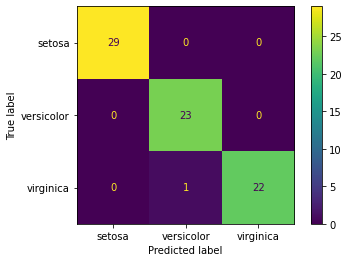

In [13]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris_df.target_names)
disp.plot()

A seguir são apresentadas algumas metricas do classificador proposto:

In [14]:
print(classification_report(y_test, y_pred, target_names=iris_df.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        29
  versicolor       0.96      1.00      0.98        23
   virginica       1.00      0.96      0.98        23

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



Podemos observar que a acuracia do classificador desenvolvido é de 1 ou seja ele não errou nenhum dos testes.

# Modelo Sklearn

In [15]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

y_pred_skl = model.predict_proba(X_test)

y_pred_class = model.predict(X_test)


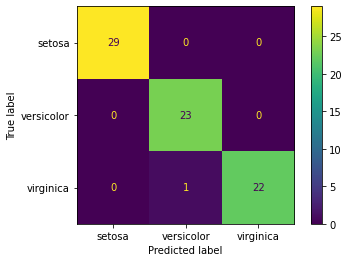

In [16]:
cm_skl = confusion_matrix(y_test, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris_df.target_names)
disp.plot()


## Comparem a acurácia do modelo desenvolvido por vocês com a acurácia do modelo provido pelo sklearn;

Podemos comparar as duas previsões com as metricas utilizadas anteriormente, onde sera usada como os dados previstos o dado pelo classificador desenvolvido por mim, e os dados de teste como o resultado provido pelo sklearn;

In [18]:
print(classification_report(y_pred_class, y_pred, target_names=iris_df.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        29
  versicolor       1.00      1.00      1.00        24
   virginica       1.00      1.00      1.00        22

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



Podemos observar que a acuracia foi de 1 ou seja 100%, desta forma o classificador desenvolvido tem um desempenho igual ao fornecido pelo sklearn para o dataset adotado e para uma divisão de treino e teste de 75%/25%.